# Contents
01- Importing Libraries
02 Creating Bar Charts
03 Histograms
04 Line Charts and Sampling

# 01 Importing Libraries


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Folder location string
path = r'C:\Users\ckra9\Documents\CareerFoundry\Instacart Basket Analysis'

In [3]:
# Importing orders & products data frame
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merge_agg_flags.pkl'))

In [8]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,user_prices_mean,spending_flag,median_days,frequency_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,77,7,9.0,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,77,7,9.0,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,77,7,9.0,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,77,7,9.0,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,77,7,9.0,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [16]:
# Getting counts of total customers with their loyalty status
ords_prods_merge.groupby('loyalty_flag').user_id.nunique()

loyalty_flag
Loyal customer       17017
New customer        112328
Regular customer     76864
Name: user_id, dtype: int64

# 02 Creating bar charts

<Axes: xlabel='order_dow'>

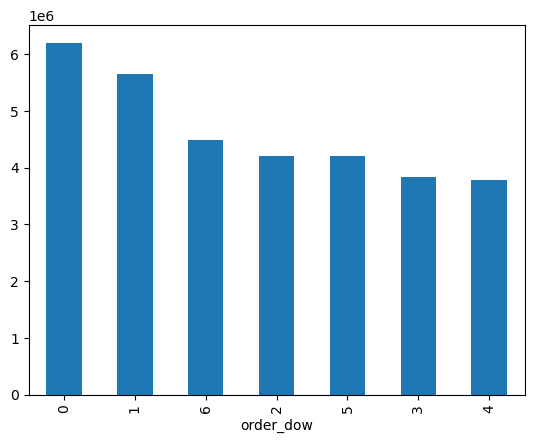

In [9]:
# Creating bar chart
ords_prods_merge['order_dow'].value_counts().plot.bar()

<Axes: xlabel='order_dow'>

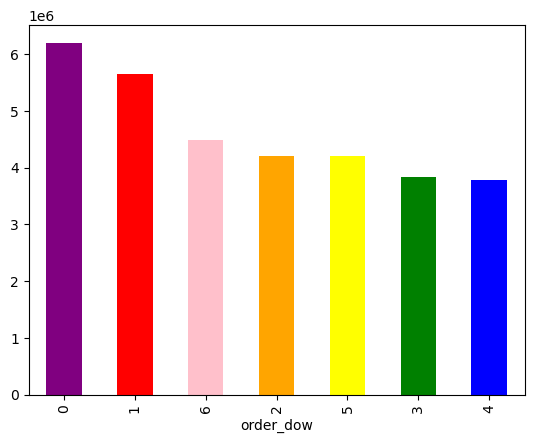

In [10]:
# Creating bar chart with color
ords_prods_merge['order_dow'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

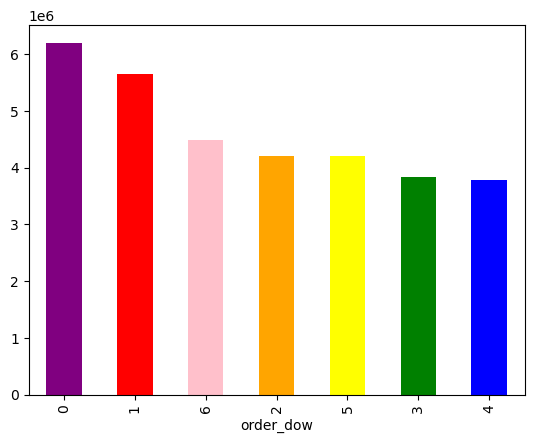

In [12]:
# saving bar chart as "bar" object
bar = ords_prods_merge['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [14]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 03 Histograms

<Axes: ylabel='Frequency'>

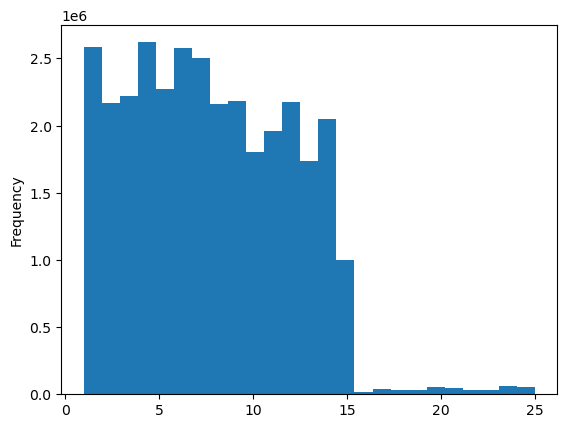

In [15]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [16]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     7.790180e+00
std      4.242125e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

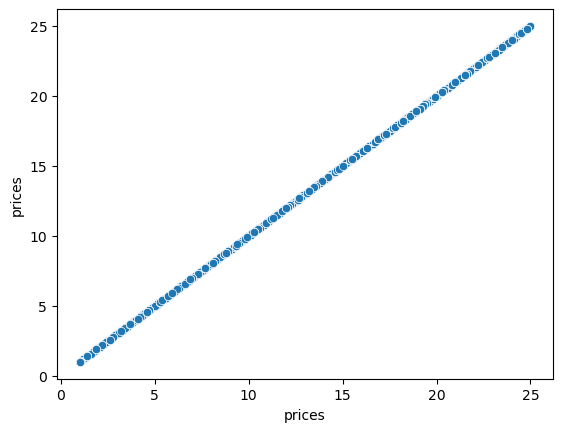

In [17]:
# Scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [18]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,user_prices_mean,spending_flag,median_days,frequency_flag


# Skipped the exercise steps regarding replacing the outliers
I had done this in a previous exercise

<Axes: ylabel='Frequency'>

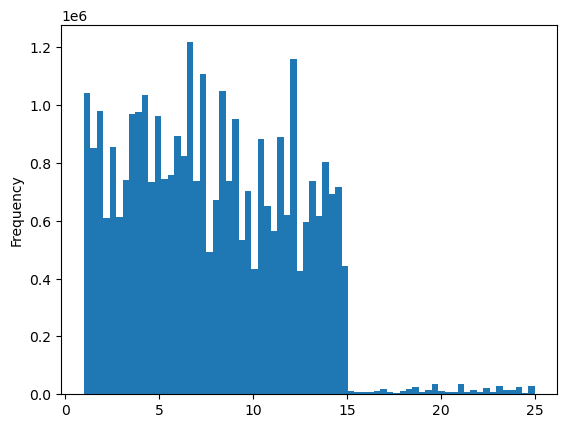

In [19]:
ords_prods_merge['prices'].plot.hist(bins = 70)

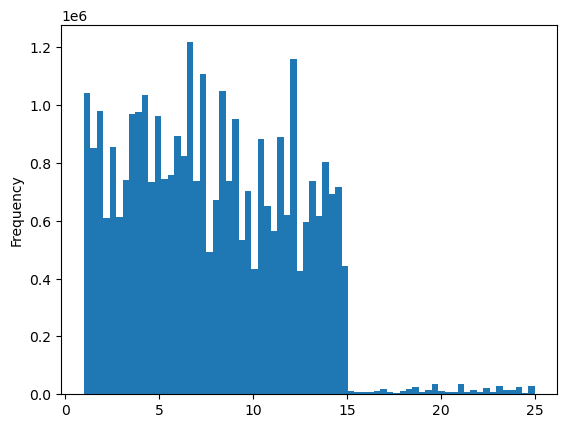

In [20]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [21]:
# Exporting histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_items.png'))

# 04 Line charts & Sampling

In [22]:
# Creating Sample
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [23]:
# Storing 70% of sample in dataframe big
big = ords_prods_merge[dev]

In [24]:
# Storing 30% of sample in dataframe small
small = ords_prods_merge[~dev]

In [25]:
# checking big and small lengths
len(big) + len(small)

32404859

In [27]:
df_2 = small[['order_dow','prices']]

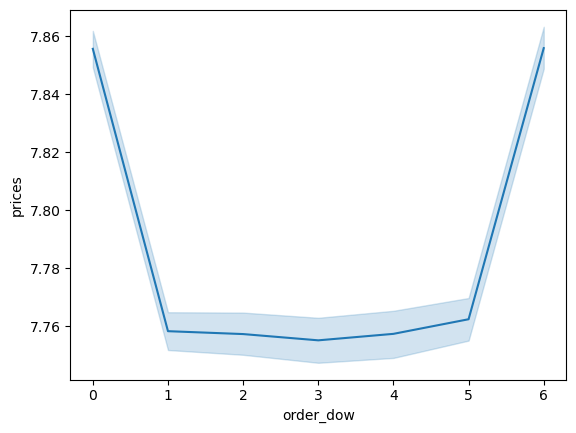

In [28]:
# Creating lineplot
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

In [29]:
# Exporting line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))